### When we see the movie Dataset the first question that comes onto our mind is 'Ratings'. The following are the Research Questions that I am covering in this notebook


   -     1) What is the Film that has higher rating than other films
          
          
   -     2) Which Genre of the film that is likely to be rated high
   
   
   -     3) Which movie is the rated by more no.of.people
   
   
   -     4) The most active user of this dataset (One who rated the most for movies)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import chdir
import seaborn as sns
import numpy as np
import plotly.express as pltly
%matplotlib inline
chdir('/home/arsath/Downloads/ml-25m')

In [8]:
movies       = pd.read_csv('movies.csv',dtype={'movieId':np.int},index_col='movieId')
ratings      = pd.read_csv('ratings.csv',dtype={'userId':np.int,'movieId':np.int,'rating':np.float,'timestamp':np.int},index_col= 'movieId',chunksize= 550000)
ratings      = pd.concat(ratings)

In [9]:
movies['genres']     = movies['genres'].str.title() 
movies.drop_duplicates(subset = ['title'],keep = 'first',inplace = True)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'],unit='s')
ratings.rename(columns = {'timestamp': 'DateTime'},inplace = True)
data_range = ratings['DateTime'].agg((min,max))
print(f"This Dataset is ranging From {data_range.loc['min'].strftime('%d-%m-%Y')} To {data_range.loc['max'].strftime('%d-%m-%Y') }")
print(91*'*')

This Dataset is ranging From 09-01-1995 To 21-11-2019
*******************************************************************************************


In [27]:
print(f"\nThis movies csv has {movies.shape[0]} Rows and {movies.shape[1]} Columns")
print(f"\nDoes this data contains any null values : {movies.isnull().any().any()}")
print(91*'*')


This movies csv has 62325 Rows and 2 Columns

Does this data contains any null values : False
*******************************************************************************************


In [28]:
print(f"\nThis ratings csv has {ratings.shape[0]} Rows and {ratings.shape[1]} Columns")
print(f"\nDoes this data contains any null values : {ratings.isnull().any().any()}")
print(91*'*')


This ratings csv has 25000095 Rows and 3 Columns

Does this data contains any null values : False
*******************************************************************************************


In [92]:
groups      = ratings.groupby('movieId',as_index=True)
counts_df   = groups['userId'].count()
mean_counts = counts_df.mean()
counts_df   = counts_df[counts_df >= mean_counts]
rate        = groups['rating'].mean().round(1)
counts_df.rename('No.of.People.Rated',inplace = True);

In [93]:
merged_df   = movies.merge(rate,on = 'movieId')
merged_df   = merged_df.merge(counts_df,on='movieId').sort_values(by =['rating','No.of.People.Rated'],ascending = False)

In [94]:
ratings_mean = merged_df['rating'].mean()
merged_df = merged_df[merged_df['rating'] >=  ratings_mean]

In [95]:
def weekend_movies():
    
    user_input = input('Enter the Genre of film to watch out for this weekend: ').title()
    return display(merged_df[merged_df['genres'].str.contains(user_input)].iloc[0:10].style.background_gradient(cmap = 'Oranges'))

available_gendres = merged_df['genres'].str.split('|')
print(set(np.concatenate(available_gendres.values).flat),end = ' ')
print('\n\n')


weekend_movies()

{'Adventure', 'Sci-Fi', '(No Genres Listed)', 'Action', 'Animation', 'Film-Noir', 'Drama', 'Imax', 'Romance', 'Thriller', 'Western', 'Crime', 'Fantasy', 'Comedy', 'Documentary', 'Musical', 'Mystery', 'War', 'Horror', 'Children'} 


Enter the Genre of film to watch out for this weekend: adventure


,title,genres,rating,No.of.People.Rated
movieId,,,,
2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,4.300000,13367
163809,Over the Garden Wall (2013),Adventure|Animation|Drama,4.300000,546
5618,Spirited Away (Sen to Chihiro no kamikakushi) (2001),Adventure|Animation|Fantasy,4.200000,22719
6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,4.200000,19894
908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,4.200000,16850
3030,Yojimbo (1961),Action|Adventure,4.200000,3996
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.100000,68717
1196,Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Sci-Fi,4.100000,57361
4993,"Lord of the Rings: The Fellowship of the Ring, The (2001)",Adventure|Fantasy,4.100000,55736


In [96]:
cnt_of_ratings_per_film = ratings[['userId','rating']].groupby(['rating','movieId']).count()
cnt_of_ratings_per_film.rename(columns={'userId':'rating_count'},inplace=True)

Enter the name of the movie to search for in this dataset: Seven samu


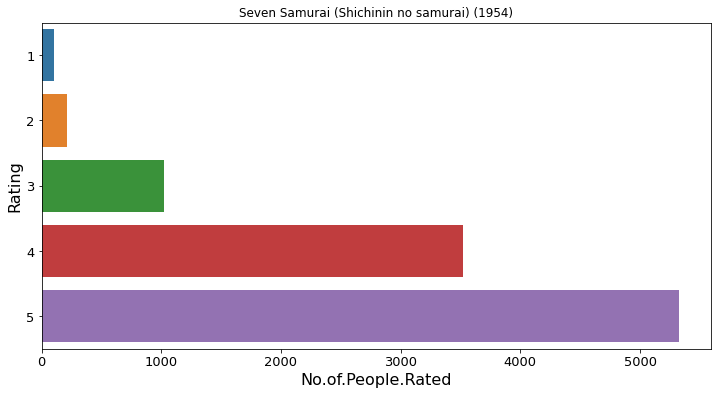

In [97]:
def access_movie_data(mov_id):  
    
    rating_per_film = [cnt_of_ratings_per_film.loc[x].loc[mov_id].values for x in range(1,6,1)]
    count_of_each_rating = pd.Series(np.concatenate(rating_per_film),index = range(1,6,1))
    mov_title = merged_df.loc[mov_id].loc['title']
    plt.figure(figsize=(12,6))
    plt.title(mov_title)
    sns.barplot(x = count_of_each_rating, y = count_of_each_rating.index, orient = 'h');
    plt.xlabel('No.of.People.Rated',fontsize = 16)
    plt.ylabel('Rating',fontsize = 16)
    plt.tick_params(labelsize = 13)
    plt.show()


get_name = input('Enter the name of the movie to search for in this dataset: ').lower()
ret_data = merged_df[merged_df['title'].str.lower().str.contains(get_name,regex = False)]
row = ret_data.shape[0]
if row > 1:
    print(ret_data)
    get_id = int(input('Enter the Id of the movie to get data in this dataset: '))
  
    if ret_data.index.isin([get_id]).any():
        access_movie_data(get_id)
    else:
        print('Invalid Movie Id')
        exit(1)

elif row == 0:
    print('No Data is Available for the film you have asked for! Please try again.')
    exit(1)

else:
    access_movie_data(ret_data.index[0])


## 1) What is the film that has higher rating than other films

In [98]:
def top_10_films():
    
    highly_rated = merged_df.iloc[0:10]
    return display(highly_rated.style.background_gradient())


top_10_films()

,title,genres,rating,No.of.People.Rated
movieId,,,,
159817,Planet Earth (2006),Documentary,4.500000,1747
171011,Planet Earth II (2016),Documentary,4.500000,1124
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.400000,81482
170705,Band of Brothers (2001),Action|Drama|War,4.400000,1356
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.300000,55366
858,"Godfather, The (1972)",Crime|Drama,4.300000,52498
1221,"Godfather: Part II, The (1974)",Crime|Drama,4.300000,34188
2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,4.300000,13367
179135,Blue Planet II (2017),Documentary,4.300000,659


### BBC's Planet Earth is secured top 2 places of this dataset
### Shawshank Redemption is the First movie that secured 3 rd place in our dataset 

## 2) Which Gendre of the Film is likely to be rated high

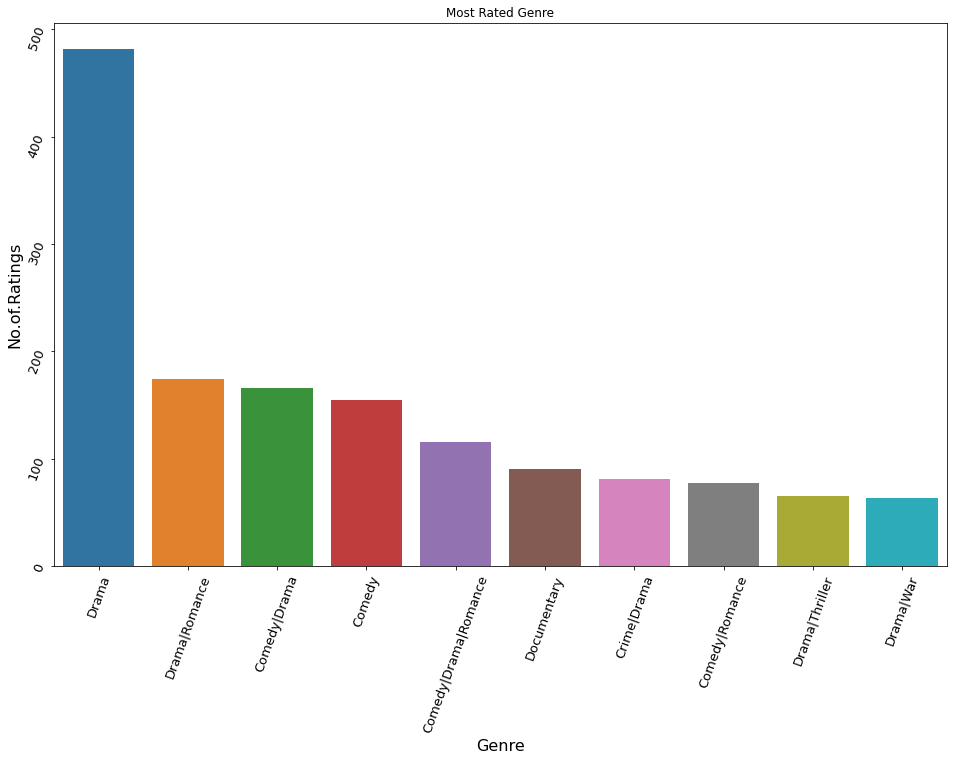

Drama                                         482
Drama|Romance                                 174
Comedy|Drama                                  166
Comedy                                        155
Comedy|Drama|Romance                          116
                                             ... 
Crime|Drama|Fantasy|Thriller                    1
Adventure|Comedy|Western                        1
Adventure|Animation|Children|Drama|Musical      1
Drama|Fantasy|Sci-Fi                            1
Adventure|Animation|Drama|Fantasy|Sci-Fi        1
Name: genres, Length: 549, dtype: int64

In [99]:
def most_rated_category():
    top_genre = merged_df.loc[:,'genres'].value_counts(ascending = False)
    plt.figure(figsize=(16,10))
    plt.title('Most Rated Genre')
    most_liked_genre = sns.barplot(x = top_genre.index[:10] ,y = top_genre[:10])
    plt.xlabel('Genre',fontsize = 16)
    plt.ylabel('No.of.Ratings',fontsize = 16)
    plt.tick_params(labelsize = 13,rotation = 70)
    plt.show()
    return top_genre

most_rated_category()

### The films which come under Drama Gendre are likely to be rated high

### 3) Which movie is rated by more no.of.people

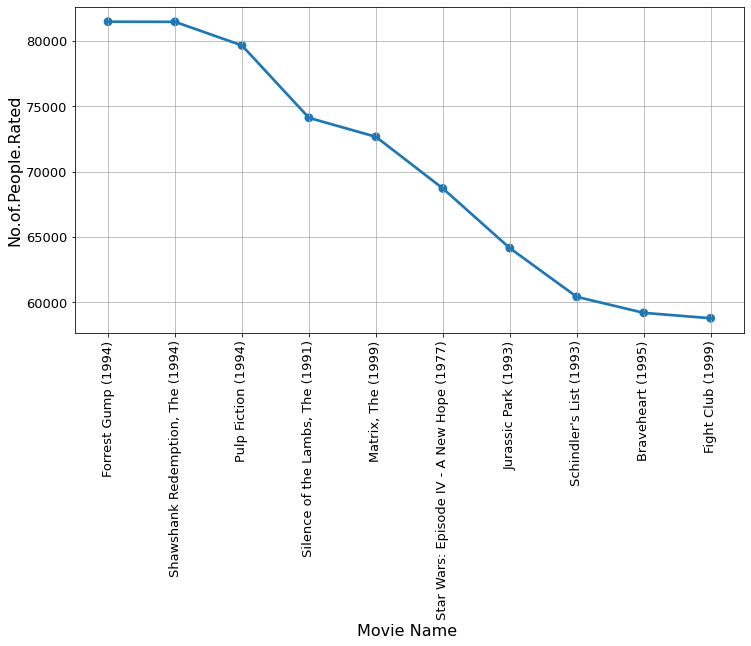

,title,genres,rating,No.of.People.Rated
movieId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.000000,81491
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.400000,81482
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.200000,79672
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.200000,74127
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.200000,72674
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.100000,68717
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.700000,64144
527,Schindler's List (1993),Drama|War,4.200000,60411
110,Braveheart (1995),Action|Drama|War,4.000000,59184


In [100]:
def rated_by_many():
    
    more = merged_df.sort_values(by = 'No.of.People.Rated',ascending = False).iloc[0:10]
    plt.figure(figsize=(12,6))
    sns.pointplot(x = more['title'] , y = more['No.of.People.Rated'],data = more)
    plt.tick_params(rotation = 90,axis = 'x')
    plt.tick_params(labelsize = 13)
    plt.xlabel('Movie Name ',fontsize = 16)
    plt.ylabel('No.of.People.Rated', fontsize = 16)
    plt.grid(True)
    plt.show()
    return more.style.background_gradient(cmap='Oranges')


rated_by_many()

### The Above plot and data clearly shows us that Forrest Gump and Shawshank Redemption got more people's attention to rate in our dataset


### 4) The most active user of this dataset (One who rated the most for movies)

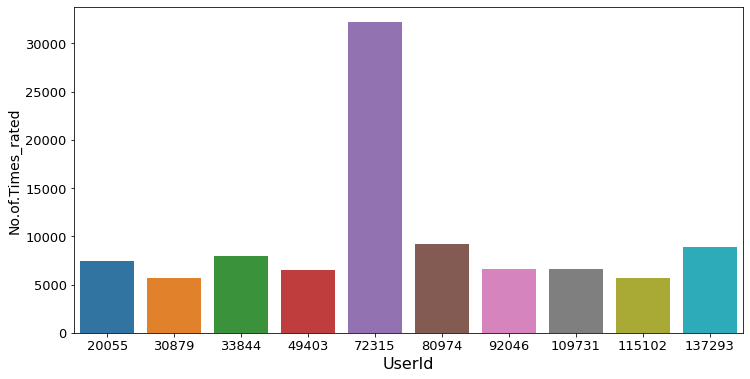

userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
129586       20
57943        20
129589       20
87801        20
56219        20
Name: times_rated, Length: 162541, dtype: int64

In [101]:
def most_active_user(): 
    
    active_user       = ratings.groupby('userId')['rating'].count().sort_values(ascending = False)
    active_user.rename('times_rated',inplace = True);
    
    plt.figure(figsize=(12,6))
    sns.barplot(x = active_user.index[0:10]  ,y = active_user.iloc[0:10])
    plt.tick_params(labelsize = 13,axis = 'both')
    plt.xlabel('UserId',fontsize = 16)
    plt.ylabel('No.of.Times_rated',fontsize = 14)
    plt.show()
    return active_user

most_active_user()

### The Above Series shows that the user 72315 is the most active user among others and 
### he is rated for 32202 films

# Thanks for watching my first ever project hopefully many more to come in the upcoming days...